#1. Perkenalan

>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama: Hana

Batch: 015-HCK

Objective: Menurut laporan FIFA 2022 (...), jumlah pemain sepakbola pada tahun 2021 kurang lebih sebanyak 100.000 pemain. Namun, dalam dataset ini yang digunakan hanya mencakup 20.000 pemain saja. Project ini bertujuan untuk memprediksi rating pemain FIFA 2023 sehingga semua pemain sepak bola profesional dapat diketahui ratingnya dan tidak menutup kemungkinan akan lahir wonderkid baru. Project ini akan dibuat menggunakan algoritma Linear Regression dan metrics evaluasi yang akan dipakai adalah MAE.

#2. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [ ]:
#Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.



In [ ]:
#Data loading

data = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing.csv')
data

Name  Age  Height  Weight   ValueEUR AttackingWorkRate  \
0               L. Messi   34     170      72   78000000            Medium   
1         R. Lewandowski   32     185      81  119500000              High   
2      Cristiano Ronaldo   36     187      83   45000000              High   
3              K. Mbappé   22     182      73  194000000              High   
4               J. Oblak   28     188      87  112000000            Medium   
...                  ...  ...     ...     ...        ...               ...   
19255           S. Black   19     180      75     100000            Medium   
19256            Ma Zhen   23     196      85      50000            Medium   
19257         Yang Haoyu   20     183      77      90000            Medium   
19258           He Siwei   20     174      69     100000            Medium   
19259      Chen Guoliang   22     186      70      70000            Medium   

      DefensiveWorkRate  PaceTotal  ShootingTotal  PassingTotal  \
0                   Low         85             92            91   
1                Medium         78             92            79   
2                   Low         87             94            80   
3                   Low         97             88            80   
4                Medium         87             92            78   
...                 ...        ...            ...           ...   
19255            Medium         56             27            29   
19256            Medium         49             47            45   
19257            Medium         57             26            29   
19258            Medium         61             25            32   
19259            Medium         55             27            29   

       DribblingTotal  DefendingTotal  PhysicalityTotal  Overall  
0                  95              34                65       93  
1                  85              44                82       92  
2                  87              34                75       91  
3                  92              36                77       91  
4                  90              52                90       91  
...               ...             ...               ...      ...  
19255              33              48                53       48  
19256              46              54                44       48  
19257              28              51                56       48  
19258              32              49                51       48  
19259              30              50                54       48  

[19260 rows x 14 columns]

In [ ]:
#Duplicate Dataset
data_duplicate = data.copy()

In [ ]:
#Rename columns

data.rename(columns = {'ValueEUR' : 'Price', 'Overall' : 'Rating'}, inplace = True)
data

Name  Age  Height  Weight      Price AttackingWorkRate  \
0               L. Messi   34     170      72   78000000            Medium   
1         R. Lewandowski   32     185      81  119500000              High   
2      Cristiano Ronaldo   36     187      83   45000000              High   
3              K. Mbappé   22     182      73  194000000              High   
4               J. Oblak   28     188      87  112000000            Medium   
...                  ...  ...     ...     ...        ...               ...   
19255           S. Black   19     180      75     100000            Medium   
19256            Ma Zhen   23     196      85      50000            Medium   
19257         Yang Haoyu   20     183      77      90000            Medium   
19258           He Siwei   20     174      69     100000            Medium   
19259      Chen Guoliang   22     186      70      70000            Medium   

      DefensiveWorkRate  PaceTotal  ShootingTotal  PassingTotal  \
0                   Low         85             92            91   
1                Medium         78             92            79   
2                   Low         87             94            80   
3                   Low         97             88            80   
4                Medium         87             92            78   
...                 ...        ...            ...           ...   
19255            Medium         56             27            29   
19256            Medium         49             47            45   
19257            Medium         57             26            29   
19258            Medium         61             25            32   
19259            Medium         55             27            29   

       DribblingTotal  DefendingTotal  PhysicalityTotal  Rating  
0                  95              34                65      93  
1                  85              44                82      92  
2                  87              34                75      91  
3                  92              36                77      91  
4                  90              52                90      91  
...               ...             ...               ...     ...  
19255              33              48                53      48  
19256              46              54                44      48  
19257              28              51                56      48  
19258              32              49                51      48  
19259              30              50                54      48  

[19260 rows x 14 columns]

In [ ]:
#cek head&tail

data.head()

Name  Age  Height  Weight      Price AttackingWorkRate  \
0           L. Messi   34     170      72   78000000            Medium   
1     R. Lewandowski   32     185      81  119500000              High   
2  Cristiano Ronaldo   36     187      83   45000000              High   
3          K. Mbappé   22     182      73  194000000              High   
4           J. Oblak   28     188      87  112000000            Medium   

  DefensiveWorkRate  PaceTotal  ShootingTotal  PassingTotal  DribblingTotal  \
0               Low         85             92            91              95   
1            Medium         78             92            79              85   
2               Low         87             94            80              87   
3               Low         97             88            80              92   
4            Medium         87             92            78              90   

   DefendingTotal  PhysicalityTotal  Rating  
0              34                65      93  
1              44                82      92  
2              34                75      91  
3              36                77      91  
4              52                90      91

In [ ]:
data.tail()

Name  Age  Height  Weight   Price AttackingWorkRate  \
19255       S. Black   19     180      75  100000            Medium   
19256        Ma Zhen   23     196      85   50000            Medium   
19257     Yang Haoyu   20     183      77   90000            Medium   
19258       He Siwei   20     174      69  100000            Medium   
19259  Chen Guoliang   22     186      70   70000            Medium   

      DefensiveWorkRate  PaceTotal  ShootingTotal  PassingTotal  \
19255            Medium         56             27            29   
19256            Medium         49             47            45   
19257            Medium         57             26            29   
19258            Medium         61             25            32   
19259            Medium         55             27            29   

       DribblingTotal  DefendingTotal  PhysicalityTotal  Rating  
19255              33              48                53      48  
19256              46              54                44      48  
19257              28              51                56      48  
19258              32              49                51      48  
19259              30              50                54      48

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   Price              19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Rating             19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


In [ ]:
#check dataset
data.describe().T

count          mean           std    min       25%  \
Age               19260.0  2.518468e+01  4.737340e+00   16.0      21.0   
Height            19260.0  1.813050e+02  6.866151e+00  155.0     176.0   
Weight            19260.0  7.495078e+01  7.066864e+00   49.0      70.0   
Price             19260.0  2.857652e+06  7.604532e+06    0.0  475000.0   
PaceTotal         19260.0  6.791023e+01  1.065645e+01   28.0      62.0   
ShootingTotal     19260.0  5.353551e+01  1.381348e+01   18.0      44.0   
PassingTotal      19260.0  5.785332e+01  9.835494e+00   25.0      52.0   
DribblingTotal    19260.0  6.302871e+01  9.704853e+00   26.0      58.0   
DefendingTotal    19260.0  5.005810e+01  1.638880e+01   14.0      35.0   
PhysicalityTotal  19260.0  6.467658e+01  9.626269e+00   29.0      58.0   
Rating            19260.0  6.581563e+01  6.817297e+00   48.0      62.0   

                       50%        75%          max  
Age                   25.0       29.0         54.0  
Height               181.0      186.0        206.0  
Weight                75.0       80.0        110.0  
Price             975000.0  2000000.0  194000000.0  
PaceTotal             68.0       75.0         97.0  
ShootingTotal         56.0       64.0         94.0  
PassingTotal          58.0       65.0         93.0  
DribblingTotal        64.0       69.0         95.0  
DefendingTotal        54.0       63.0         91.0  
PhysicalityTotal      66.0       72.0         92.0  
Rating                66.0       70.0         93.0

- tinggi rata-rata orang asia adalah 170-175cm, dari statistik sederhana yang dilakukan, dataset ini memiliki rata-rata tinggi badan 181cm, artinya pemain asia pada dataset ini sedikit

#4. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

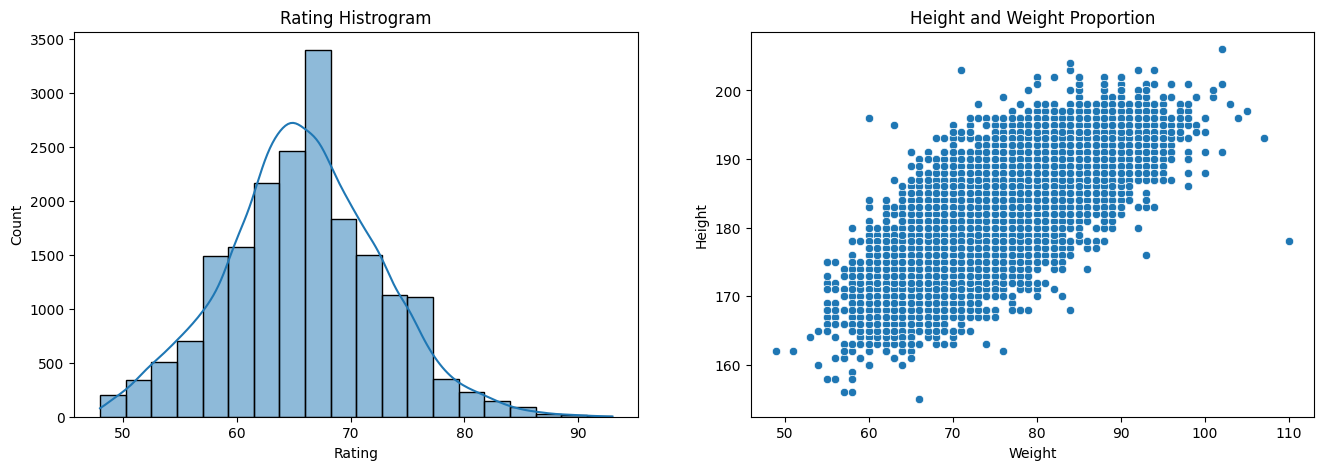

In [ ]:
#create Histogram and Scatter plot

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(data['Rating'], kde = True, bins = 20)
plt.title('Rating Histrogram')

plt.subplot(1,2,2)
sns.scatterplot(x = 'Weight', y = 'Height', data = data)
plt.title('Height and Weight Proportion')
plt.show()

- Terlihat dari plot histogram, rating terdistribusi normal dengan rata-rata di sekitar 65
- Tinggi dan berat badan pemain cukup proporsional, terlihat dari berat dan tinggi pemain yang seimbang

#5. Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Handling Cardinality

akan dibahas di hari rabu

## Splitting Between Train-set and Test-set

In [ ]:
#Split between X & y

X = data.drop('Rating', axis = 1)
y = data['Rating']
X

Name  Age  Height  Weight      Price AttackingWorkRate  \
0               L. Messi   34     170      72   78000000            Medium   
1         R. Lewandowski   32     185      81  119500000              High   
2      Cristiano Ronaldo   36     187      83   45000000              High   
3              K. Mbappé   22     182      73  194000000              High   
4               J. Oblak   28     188      87  112000000            Medium   
...                  ...  ...     ...     ...        ...               ...   
19255           S. Black   19     180      75     100000            Medium   
19256            Ma Zhen   23     196      85      50000            Medium   
19257         Yang Haoyu   20     183      77      90000            Medium   
19258           He Siwei   20     174      69     100000            Medium   
19259      Chen Guoliang   22     186      70      70000            Medium   

      DefensiveWorkRate  PaceTotal  ShootingTotal  PassingTotal  \
0                   Low         85             92            91   
1                Medium         78             92            79   
2                   Low         87             94            80   
3                   Low         97             88            80   
4                Medium         87             92            78   
...                 ...        ...            ...           ...   
19255            Medium         56             27            29   
19256            Medium         49             47            45   
19257            Medium         57             26            29   
19258            Medium         61             25            32   
19259            Medium         55             27            29   

       DribblingTotal  DefendingTotal  PhysicalityTotal  
0                  95              34                65  
1                  85              44                82  
2                  87              34                75  
3                  92              36                77  
4                  90              52                90  
...               ...             ...               ...  
19255              33              48                53  
19256              46              54                44  
19257              28              51                56  
19258              32              49                51  
19259              30              50                54  

[19260 rows x 13 columns]

In [ ]:
#Splitting between train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train_size: ' , X_train.shape)
print('Test_size: ', X_test.shape)

Train_size:  (15408, 13)
Test_size:  (3852, 13)


In [ ]:
X_train

Name  Age  Height  Weight     Price AttackingWorkRate  \
3035      C. Robinson   26     178      75   4000000            Medium   
3964             Samu   25     173      70   2500000              High   
511     Ander Herrera   31     182      71  14500000              High   
17897   L. Beckemeyer   21     182      75    250000            Medium   
4230        I. Jakobs   21     184      75   4200000              High   
...               ...  ...     ...     ...       ...               ...   
11284      R. Meißner   21     181      78   1300000              High   
11964    J. Leutwiler   32     196      80    300000            Medium   
5390   Heitinho Zanon   25     187      79   1500000            Medium   
860            E. Eze   23     178      67  16500000            Medium   
15795    J. Rodríguez   19     179      62    500000            Medium   

      DefensiveWorkRate  PaceTotal  ShootingTotal  PassingTotal  \
3035             Medium         79             73            65   
3964             Medium         77             58            64   
511                High         65             72            77   
17897            Medium         59             57            51   
4230               High         86             58            58   
...                 ...        ...            ...           ...   
11284            Medium         68             65            43   
11964            Medium         63             61            62   
5390             Medium         61             34            47   
860              Medium         77             69            73   
15795            Medium         72             28            40   

       DribblingTotal  DefendingTotal  PhysicalityTotal  
3035               75              32                61  
3964               77              44                56  
511                79              78                75  
17897              58              34                51  
4230               73              61                69  
...               ...             ...               ...  
11284              62              22                63  
11964              66              46                65  
5390               39              70                77  
860                81              47                68  
15795              40              59                60  

[15408 rows x 13 columns]

## Handling Outliers

akan dibahas di hari rabu

## Handling Missing Values

akan dibahas di hari rabu

In [ ]:
X_train.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [ ]:
X_test.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [ ]:
y_train.isnull().sum()

0

In [ ]:
y_test.isnull().sum()

0

Data tidak memiliki missing value, sehingga proses feature engineering bisa dilanjutkan ke tahap selanjutnya

##Split Between Numeric Columns and Categorical Columns

In [ ]:
#get numeric and categorical column

cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
num_columns = X_train.select_dtypes(include = np.number).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Categorical Columns:  ['Name', 'AttackingWorkRate', 'DefensiveWorkRate']


In [ ]:
#Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_cat

Name AttackingWorkRate DefensiveWorkRate
3035      C. Robinson            Medium            Medium
3964             Samu              High            Medium
511     Ander Herrera              High              High
17897   L. Beckemeyer            Medium            Medium
4230        I. Jakobs              High              High
...               ...               ...               ...
11284      R. Meißner              High            Medium
11964    J. Leutwiler            Medium            Medium
5390   Heitinho Zanon            Medium            Medium
860            E. Eze            Medium            Medium
15795    J. Rodríguez            Medium            Medium

[15408 rows x 3 columns]

## Feature Selection

akan dipelajari lebih dalam di hari rabu

In [ ]:
X_train_cat

Name AttackingWorkRate DefensiveWorkRate
3035      C. Robinson            Medium            Medium
3964             Samu              High            Medium
511     Ander Herrera              High              High
17897   L. Beckemeyer            Medium            Medium
4230        I. Jakobs              High              High
...               ...               ...               ...
11284      R. Meißner              High            Medium
11964    J. Leutwiler            Medium            Medium
5390   Heitinho Zanon            Medium            Medium
860            E. Eze            Medium            Medium
15795    J. Rodríguez            Medium            Medium

[15408 rows x 3 columns]

Berdasarkan personal judgement, tidak ada kaitannya nama dengan rating pemain sepak bola. Ini bisa dibuktikan dengan nama Fadhil Ronaldo tidak kaitannya dengan nama sehebat Christiano Ronaldo sehiingga rating nya pun akan berbeda.

In [ ]:
#Drop column 'Name'

X_train_cat.drop('Name', axis = 1, inplace = True)
X_test_cat.drop('Name', axis = 1, inplace = True)

X_train_cat


<ipython-input-20-daf7d58f6645>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat.drop('Name', axis = 1, inplace = True)
<ipython-input-20-daf7d58f6645>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat.drop('Name', axis = 1, inplace = True)


AttackingWorkRate DefensiveWorkRate
3035             Medium            Medium
3964               High            Medium
511                High              High
17897            Medium            Medium
4230               High              High
...                 ...               ...
11284              High            Medium
11964            Medium            Medium
5390             Medium            Medium
860              Medium            Medium
15795            Medium            Medium

[15408 rows x 2 columns]

In [ ]:
num_columns = X_train_num.columns.tolist()
cat_columns = X_train_cat.columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Cat Columns :  ['AttackingWorkRate', 'DefensiveWorkRate']


## Feature Scaling

In [ ]:
#Feature Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.26315789, 0.45098039, 0.42622951, ..., 0.75384615, 0.23376623,
        0.50793651],
       [0.23684211, 0.35294118, 0.3442623 , ..., 0.78461538, 0.38961039,
        0.42857143],
       [0.39473684, 0.52941176, 0.36065574, ..., 0.81538462, 0.83116883,
        0.73015873],
       ...,
       [0.23684211, 0.62745098, 0.49180328, ..., 0.2       , 0.72727273,
        0.76190476],
       [0.18421053, 0.45098039, 0.29508197, ..., 0.84615385, 0.42857143,
        0.61904762],
       [0.07894737, 0.47058824, 0.21311475, ..., 0.21538462, 0.58441558,
        0.49206349]])

## Feature Encoding

Jelaskan alasan pemilihan teknik encoding

In [ ]:
X_train_cat

AttackingWorkRate DefensiveWorkRate
3035             Medium            Medium
3964               High            Medium
511                High              High
17897            Medium            Medium
4230               High              High
...                 ...               ...
11284              High            Medium
11964            Medium            Medium
5390             Medium            Medium
860              Medium            Medium
15795            Medium            Medium

[15408 rows x 2 columns]

In [ ]:
#Feature Encoding using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High'],
                                     ['Low', 'Medium', 'High']])
encoder.fit(X_train_cat)

OrdinalEncoder(categories=[['Low', 'Medium', 'High'],
                           ['Low', 'Medium', 'High']])

In [ ]:
X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[1., 1.],
       [2., 1.],
       [2., 2.],
       ...,
       [1., 1.],
       [1., 1.],
       [1., 1.]])

## Concate between Numeric Columns and Categorical Columns

In [ ]:
#Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)

X_train_final.shape

(15408, 12)

In [ ]:
X_train_final_datframe = pd.DataFrame(X_train_final, columns = [num_columns + cat_columns])
X_train_final_datframe

Age    Height    Weight     Price PaceTotal ShootingTotal  \
0      0.263158  0.450980  0.426230  0.029091  0.750000      0.723684   
1      0.236842  0.352941  0.344262  0.018182  0.720588      0.526316   
2      0.394737  0.529412  0.360656  0.105455  0.544118      0.710526   
3      0.131579  0.529412  0.426230  0.001818  0.455882      0.513158   
4      0.131579  0.568627  0.426230  0.030545  0.852941      0.526316   
...         ...       ...       ...       ...       ...           ...   
15403  0.131579  0.509804  0.475410  0.009455  0.588235      0.618421   
15404  0.421053  0.803922  0.508197  0.002182  0.514706      0.565789   
15405  0.236842  0.627451  0.491803  0.010909  0.485294      0.210526   
15406  0.184211  0.450980  0.295082  0.120000  0.720588      0.671053   
15407  0.078947  0.470588  0.213115  0.003636  0.647059      0.131579   

      PassingTotal DribblingTotal DefendingTotal PhysicalityTotal  \
0         0.588235       0.753846       0.233766         0.507937   
1         0.573529       0.784615       0.389610         0.428571   
2         0.764706       0.815385       0.831169         0.730159   
3         0.382353       0.492308       0.259740         0.349206   
4         0.485294       0.723077       0.610390         0.634921   
...            ...            ...            ...              ...   
15403     0.264706       0.553846       0.103896         0.539683   
15404     0.544118       0.615385       0.415584         0.571429   
15405     0.323529       0.200000       0.727273         0.761905   
15406     0.705882       0.846154       0.428571         0.619048   
15407     0.220588       0.215385       0.584416         0.492063   

      AttackingWorkRate DefensiveWorkRate  
0                   1.0               1.0  
1                   2.0               1.0  
2                   2.0               2.0  
3                   1.0               1.0  
4                   2.0               2.0  
...                 ...               ...  
15403               2.0               1.0  
15404               1.0               1.0  
15405               1.0               1.0  
15406               1.0               1.0  
15407               1.0               1.0  

[15408 rows x 12 columns]

# 6. Model Definition

>Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [ ]:
# Define algorithm

from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()

# 7. Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [ ]:
#Train the model

model_lin_reg.fit(X_train_final, y_train)


LinearRegression()

## 8. Model Evaluation

>Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [ ]:
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

y_pred_train

array([68.73327461, 67.88839569, 79.77402457, ..., 61.58921355,
       75.46784852, 55.39850764])

In [ ]:
#Model Evaluation using MAE

from sklearn.metrics import mean_absolute_error

print('Error - train set: ', mean_absolute_error(y_train, y_pred_train))
print('Error - test set: ', mean_absolute_error(y_test, y_pred_test))

Error - train set:  2.3455452086421467
Error - test set:  2.341414564002488


## 9. Model Saving

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [ ]:
import pickle
import json

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

# Kesimpulan

>Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Narasi based on EDA
2. Narasi based on Model Evaluation and Analysis
3. Further Improvement
4. DLL